# DAwPy_Preclass_10

## Combining Data Frames
- pd.merge([df1,df2]) : 
    - Many joins on multiple column


- df1.join(df2) :
    - Inner/outer/left/right joins on indexes


- pd.concat([df1,df2]) : 
    - Multiple dataframes, 
    - Stacking both horizontally and vertically 
    - Inner/Outer joins on indexes


- df1.append(df2) : 
    - Stacking vertically

In Pandas merge( ) and join( ) are used for a horizontal combination, whereas concat() and append() are used for vertical combination. 

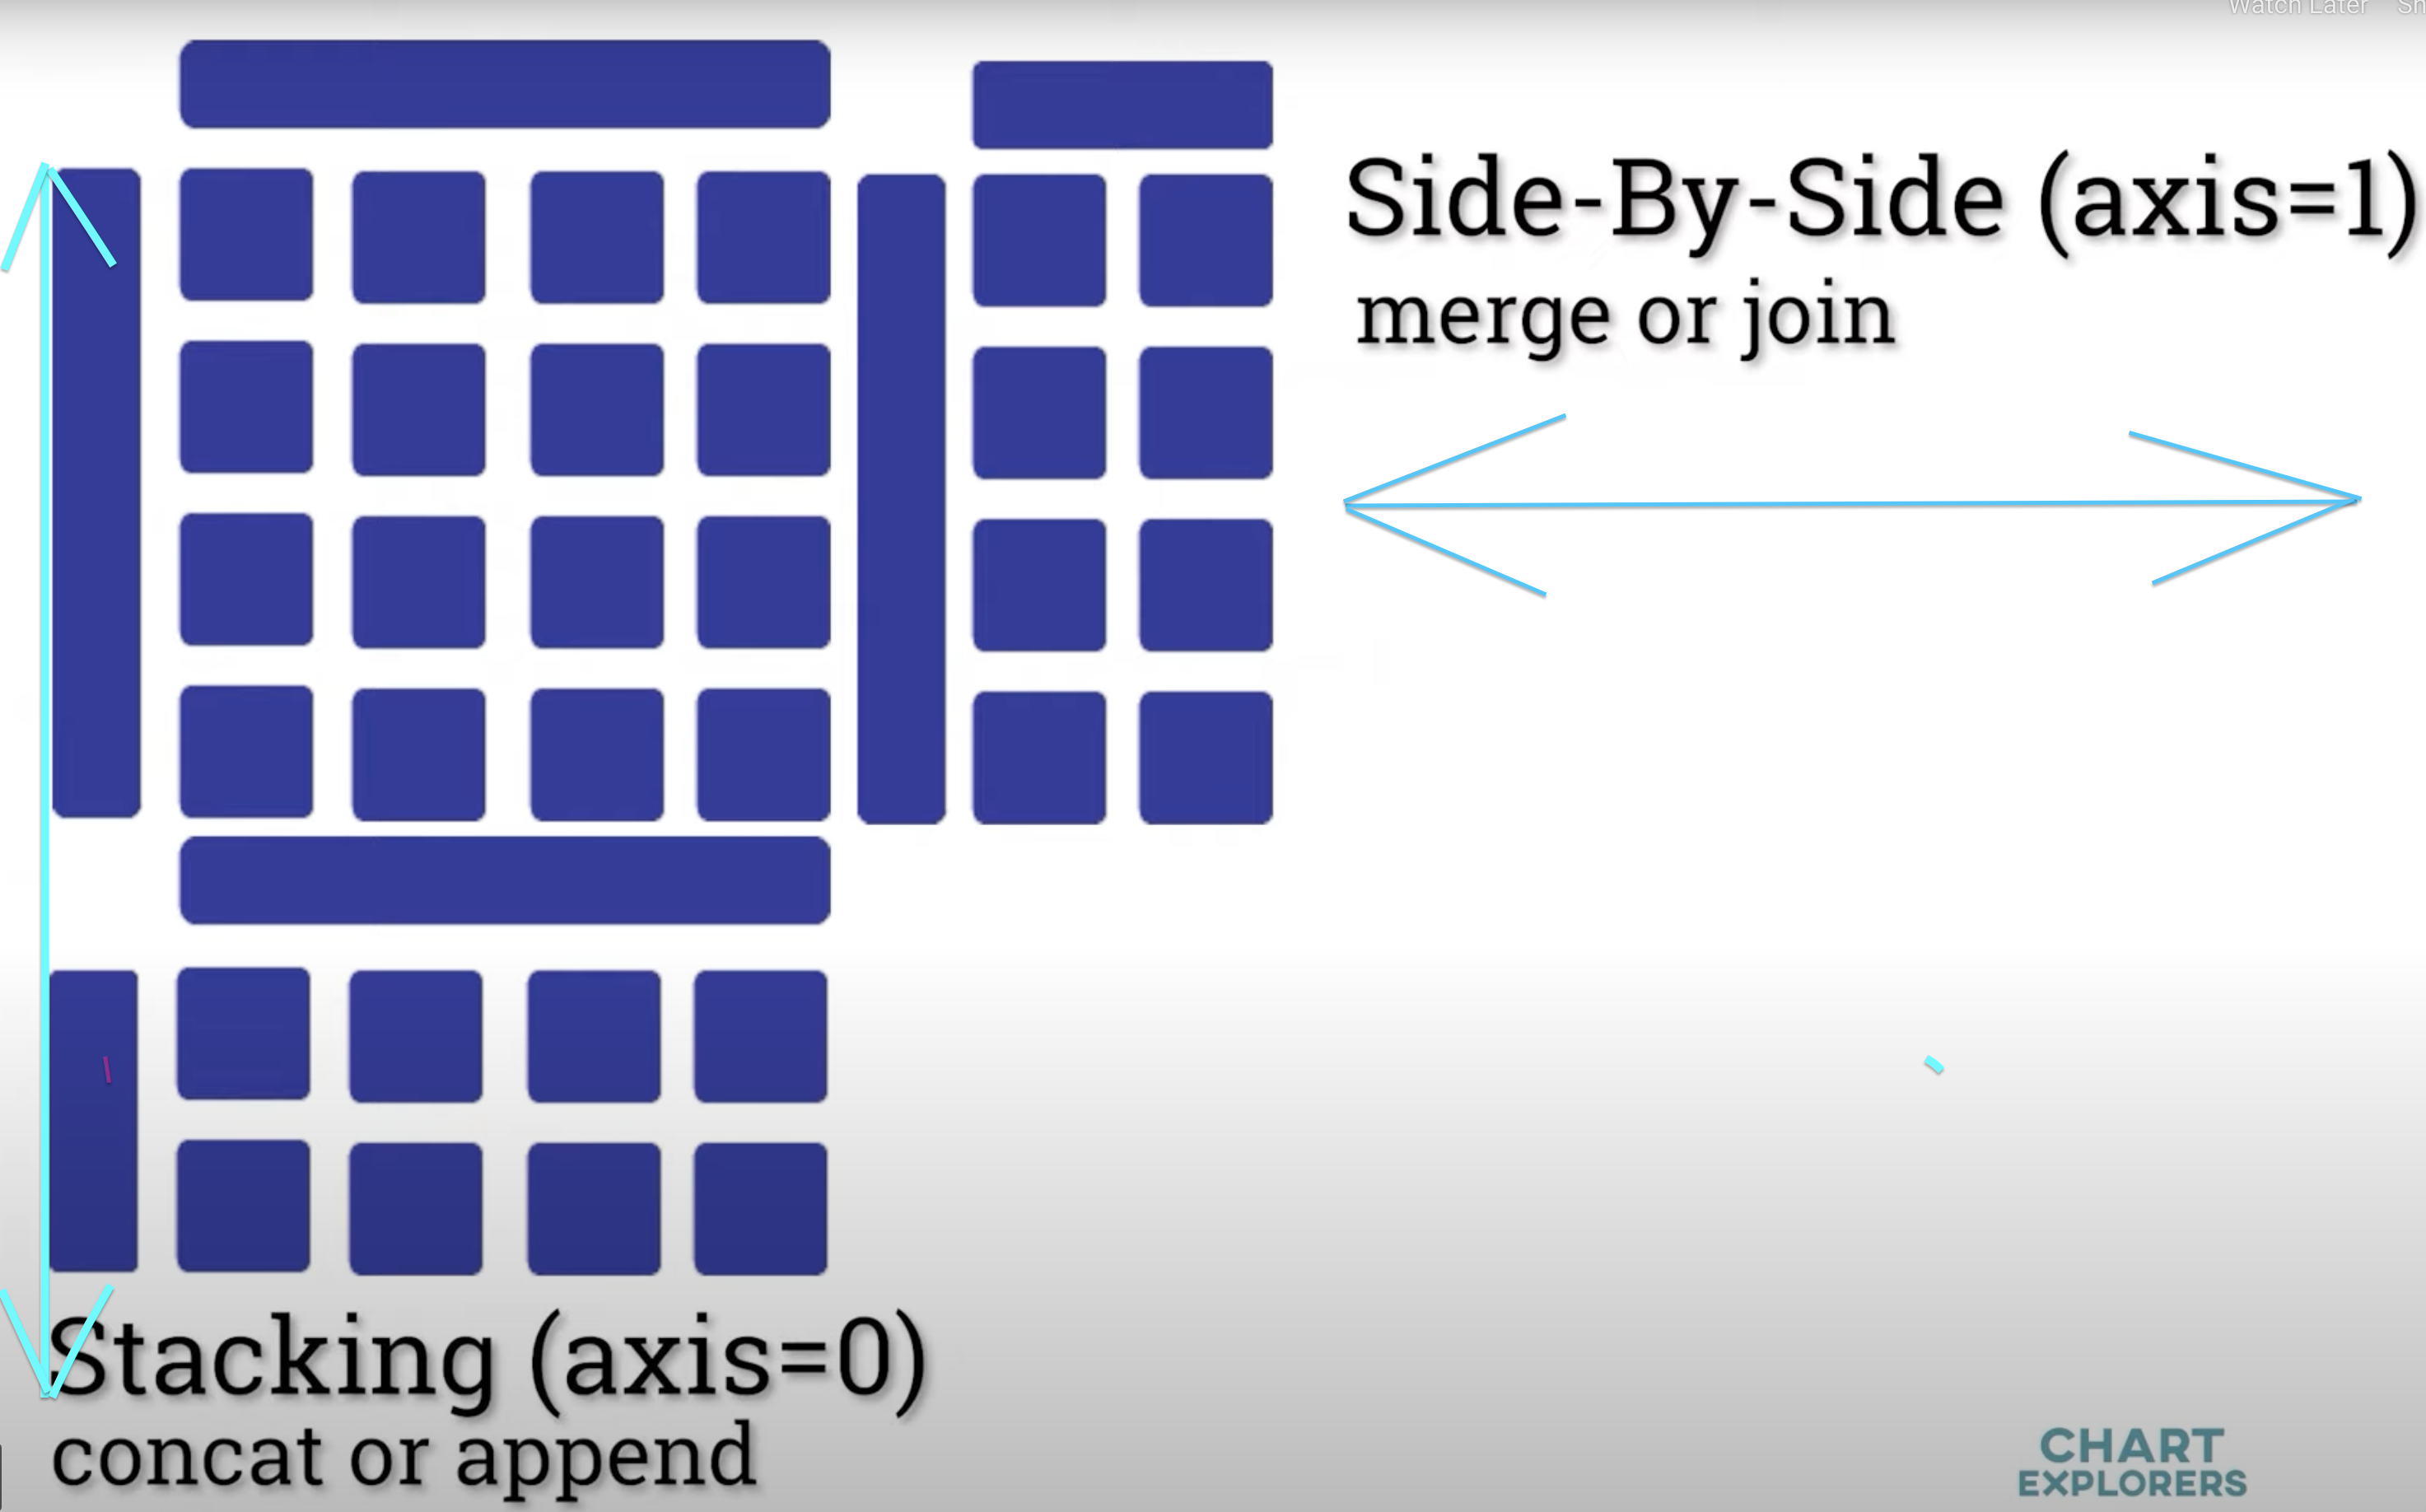

In [146]:
import numpy as np
import pandas as pd


### df.merge() 

In [82]:
df1 = pd.DataFrame({"ID":[1,2,3,5,9],
                   "Col_1":[1,2,3,4,5],
                   "Col_2":[6,7,8,9,10],
                   "Col_3":[11,12,13,14,15],
                   "Col_4":["apple","orange","banana",'strawberry',"rasberry"]
                   })

df2 = pd.DataFrame({"ID":[1,1,3,5],
                   "Col_A":[8,9,10,11],
                   "Col_B":[12,13,15,17],
                    "Col_4":["apple","orange","banana","kiwi"],
                   })

In [3]:
df1.columns

Index(['ID', 'Col_1', 'Col_2', 'Col_3', 'Col_4'], dtype='object')

In [4]:
df2.columns

Index(['ID', 'Col_A', 'Col_B', 'Col_4'], dtype='object')

In [5]:
df_merged = pd.merge(df1,df2)
df_merged.columns 

Index(['ID', 'Col_1', 'Col_2', 'Col_3', 'Col_4', 'Col_A', 'Col_B'], dtype='object')

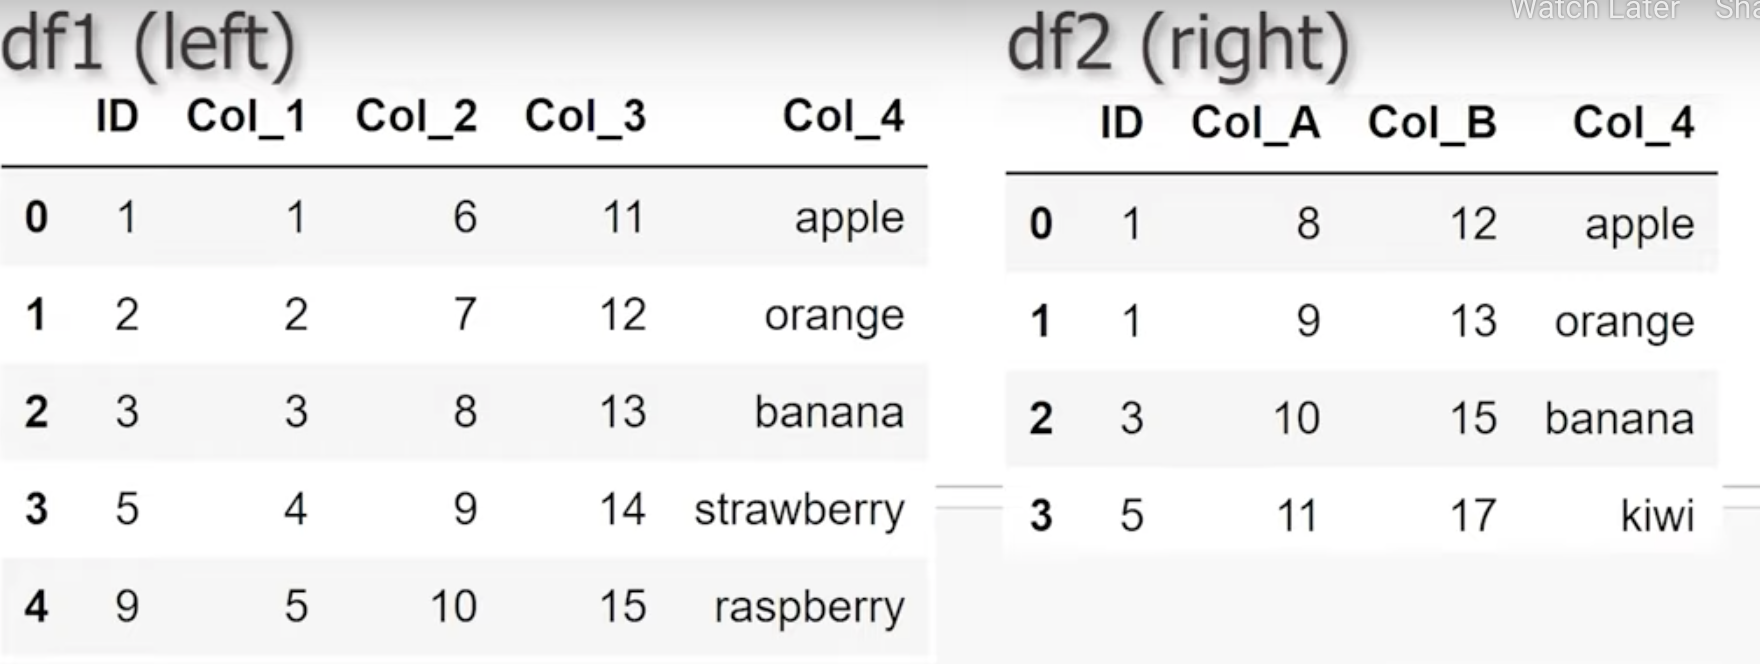

In [7]:
df_merged   

# kosul belirtilmedigi ortak sutunlarda ortak degerleri olan satirlari birlestirdi
# "inner join"

ID  Col_1  Col_2  Col_3   Col_4  Col_A  Col_B
0   1      1      6     11   apple      8     12
1   3      3      8     13  banana     10     15

#### Joining on common column

In [65]:
pd.merge(df1, df2, on='ID')

# on = Column or index level names to join on (birlestirilmek istenen sutunu belirtmek icin kullanilir)
# ID degeri ayni olanlari secerek birlestiriyoruz


# ayni isimli sutunlarda farkli degerler varsa bu degerleri farkli sutun adiyla korur ornek col_4_x ve col_4_y

ID  Col_1  Col_2  Col_3     Col_4_x  Col_A  Col_B Col_4_y
0   1      1      6     11       apple      8     12   apple
1   1      1      6     11       apple      9     13  orange
2   3      3      8     13      banana     10     15  banana
3   5      4      9     14  strawberry     11     17    kiwi

In [13]:
pd.merge(df1, df2, on='ID', suffixes=["_left","_right"])

# suffixes : The suffix is needed only when the merged dataframe has two columns with same name. 
# default suffixes:  (“_x”, “_y”)

ID  Col_1  Col_2  Col_3  Col_4_left  Col_A  Col_B Col_4_right
0   1      1      6     11       apple      8     12       apple
1   1      1      6     11       apple      9     13      orange
2   3      3      8     13      banana     10     15      banana
3   5      4      9     14  strawberry     11     17        kiwi

#### Joining on more than one common columns

In [14]:
pd.merge(df1, df2, on='ID','Col_4') bu kullanim hata verir 

#hem ID hem Col_4 colonlari ayni olanlari getirdi 

ID  Col_1  Col_2  Col_3   Col_4  Col_A  Col_B
0   1      1      6     11   apple      8     12
1   3      3      8     13  banana     10     15

#### Joining on different named column

In [69]:
pd.merge(df1,df2, left_on="Col_2", right_on="Col_A" )

# left_on:  Column or index level names to join on in the left DataFrame (sol dataframede birlestirilecek sutun)

# birlestirirken soldan "left_on" ile sagdan "righ_on" sutunlarindan birlestirir 

ID_x  Col_1  Col_2  Col_3     Col_4_x  ID_y  Col_A  Col_B Col_4_y
0     3      3      8     13      banana     1      8     12   apple
1     5      4      9     14  strawberry     1      9     13  orange
2     9      5     10     15    rasberry     3     10     15  banana

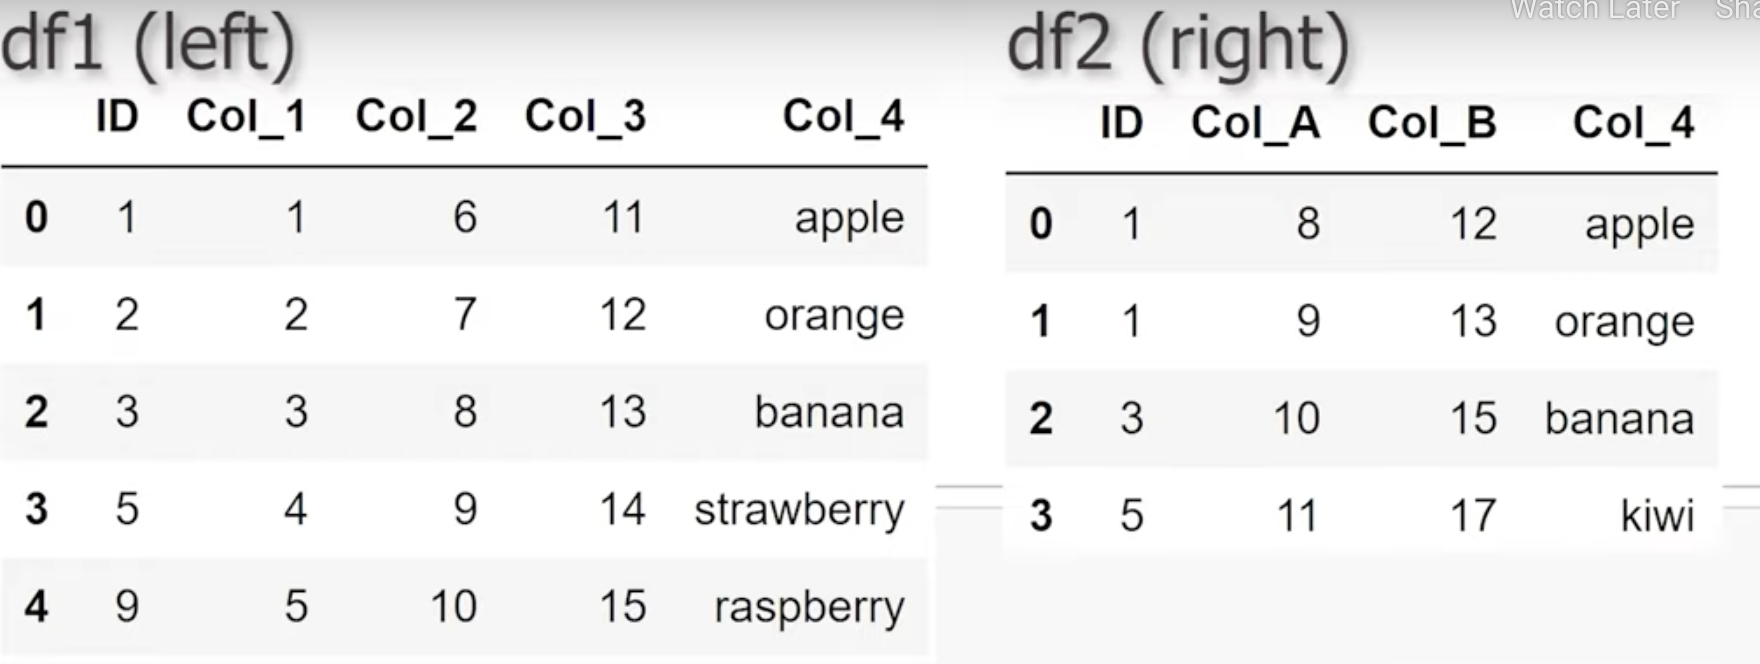

#### Keep Indexes on each dataframe

In [16]:
pd.merge(df1.reset_index(), df2.reset_index(), on=['ID','Col_4'] )
 
#DataFramelerde indexleriyle birlikte getirir 

index_x  ID  Col_1  Col_2  Col_3   Col_4  index_y  Col_A  Col_B
0        0   1      1      6     11   apple        0      8     12
1        2   3      3      8     13  banana        2     10     15

#### Joining on Indicates

In [17]:
# pd.merge(df1,df) 
pd.merge(df1,df2, left_index=False, right_index=False)

# left_index/right_index: bool, default False
# kosul verilmedikce inner birlesim yapar

ID  Col_1  Col_2  Col_3   Col_4  Col_A  Col_B
0   1      1      6     11   apple      8     12
1   3      3      8     13  banana     10     15

In [18]:
pd.merge(df1,df2, left_index=True, right_index=True)

# Left_index ve righ_index'i baz alarak birlesim yapar
# index numarasi ayni olan satirlari alarak index numarasina gore birlestirmis olur

ID_x  Col_1  Col_2  Col_3     Col_4_x  ID_y  Col_A  Col_B Col_4_y
0     1      1      6     11       apple     1      8     12   apple
1     2      2      7     12      orange     1      9     13  orange
2     3      3      8     13      banana     3     10     15  banana
3     5      4      9     14  strawberry     5     11     17    kiwi

#### Joining on Index and specific column

In [87]:
pd.merge(df1,df2, left_index=True, right_on= "ID", suffixes=["_left", "_right"])

# Sol tarafin index numarasi ile sag tarafin ID numarasini baz alarak birlesim yapar

ID  ID_left  Col_1  Col_2  Col_3  Col_4_left  ID_right  Col_A  Col_B  \
0   1        2      2      7     12      orange         1      8     12   
1   1        2      2      7     12      orange         1      9     13   
2   3        5      4      9     14  strawberry         3     10     15   

  Col_4_right  
0       apple  
1      orange  
2      banana

#### Join Types in Pandas

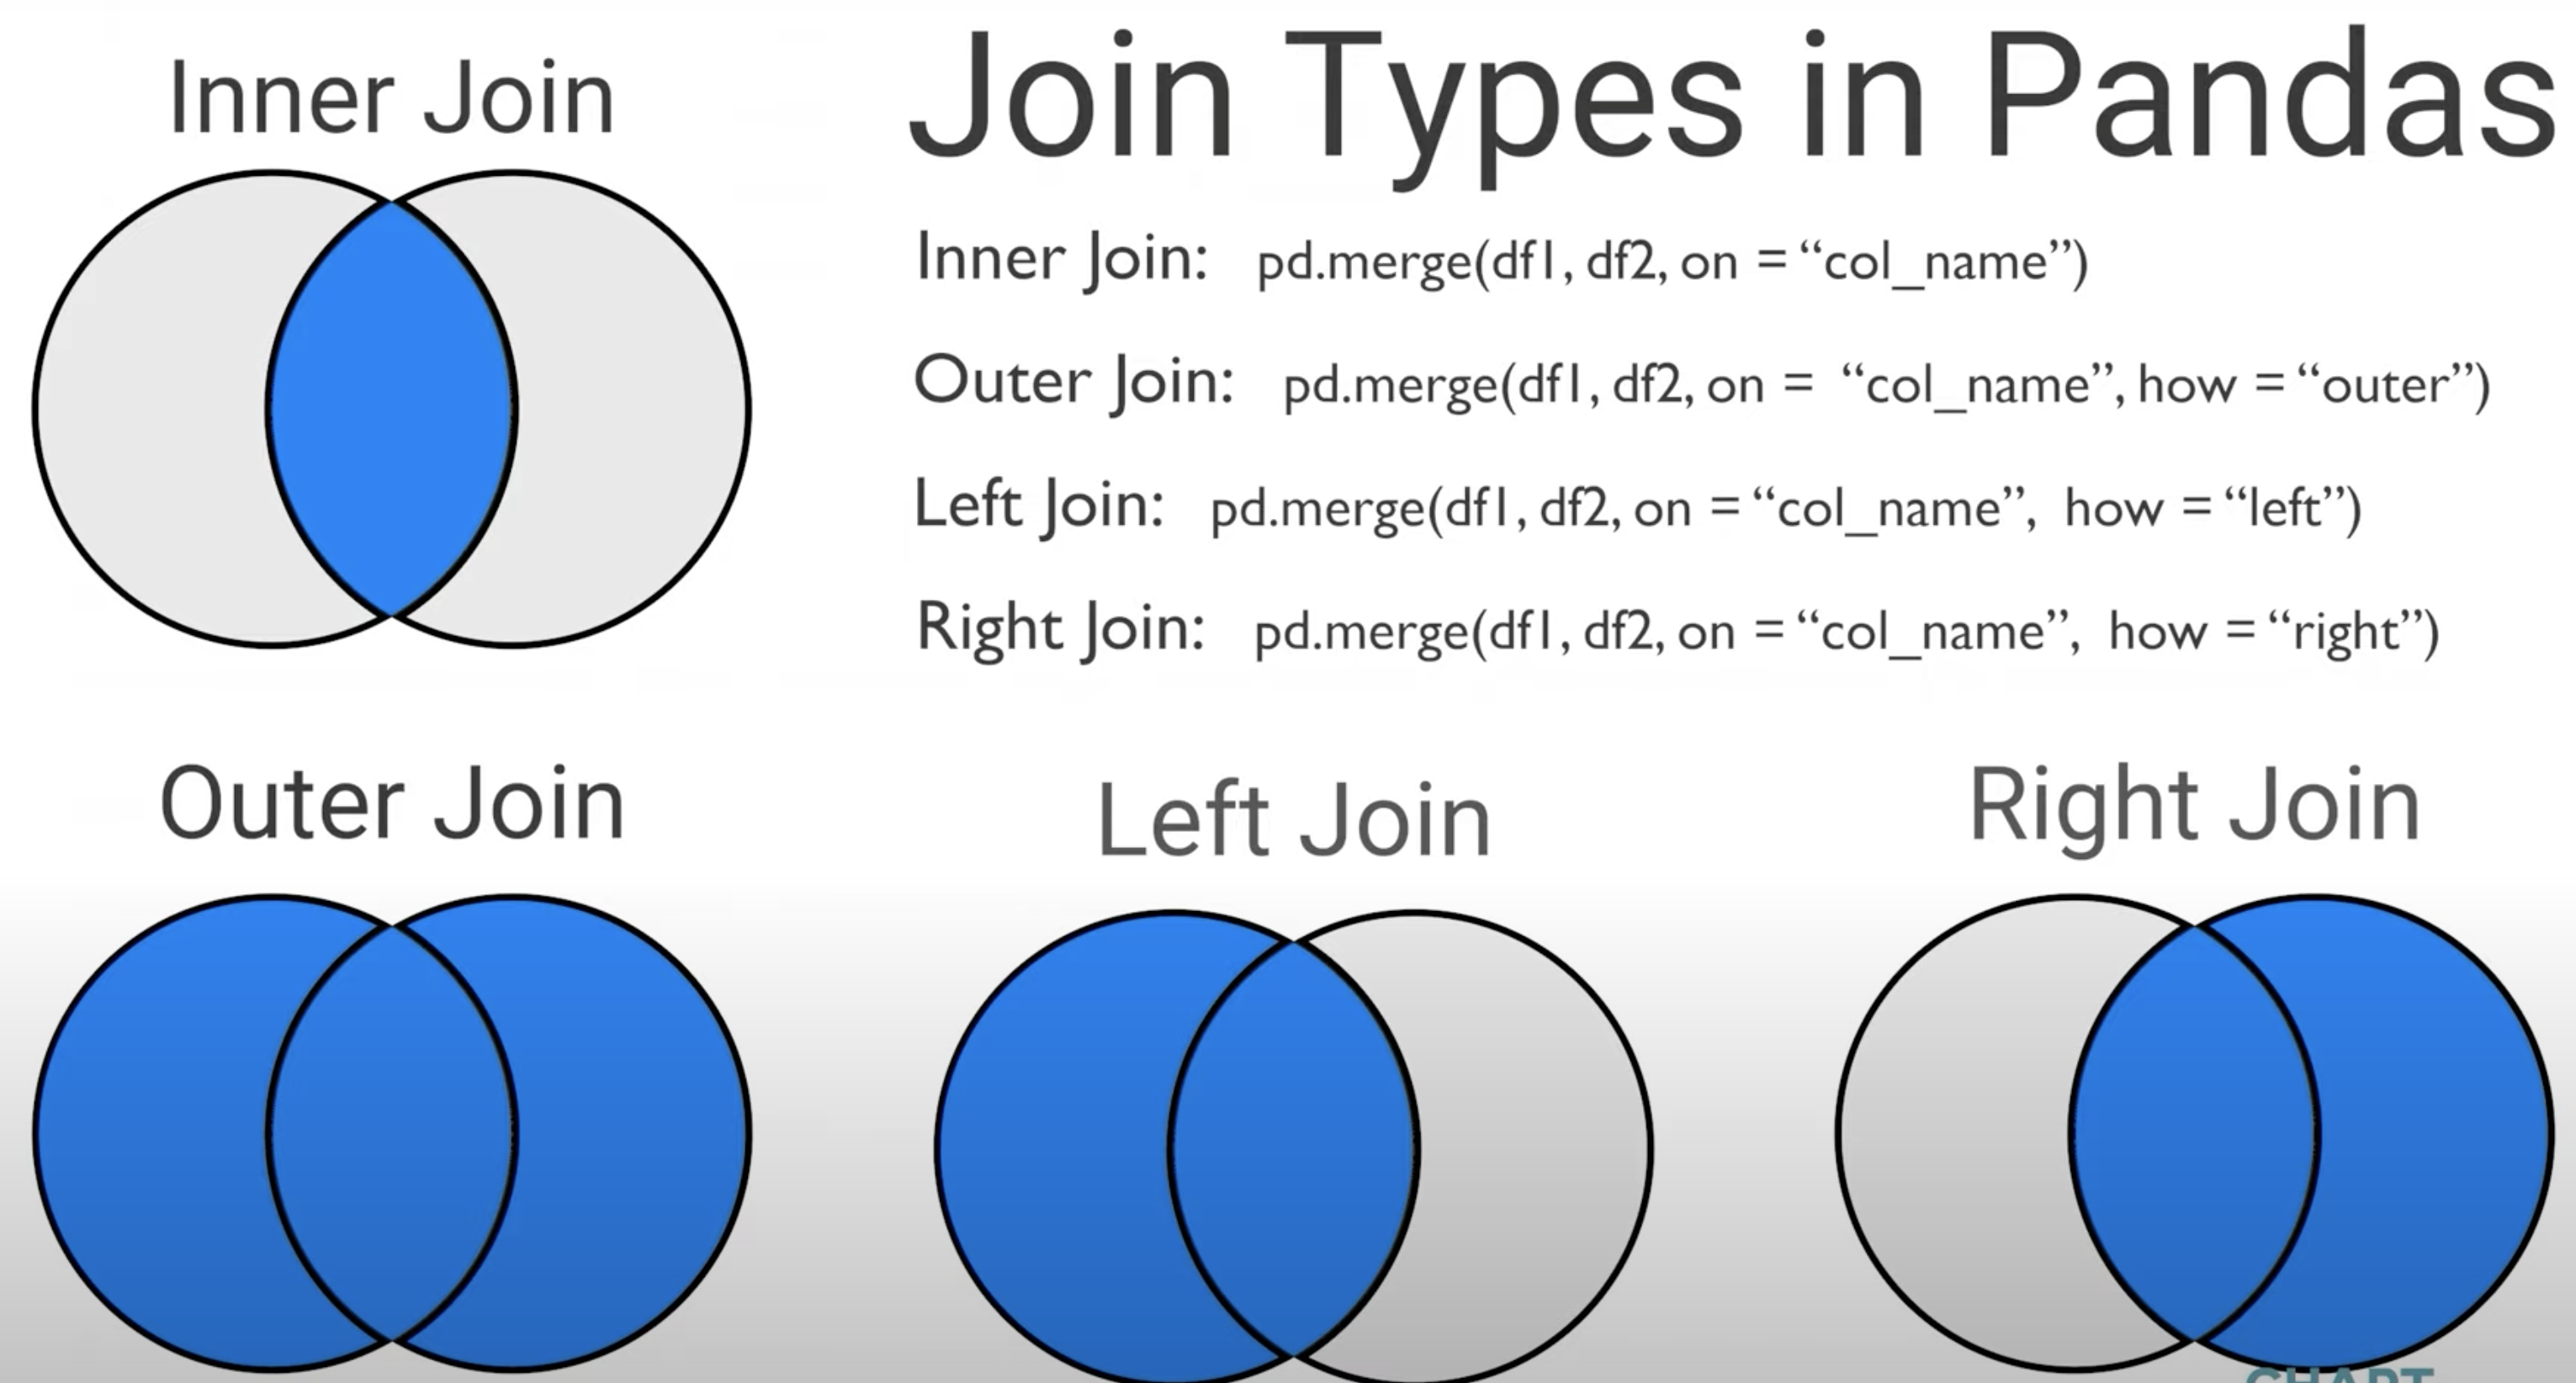

- outer join 

In [20]:
pd.merge(df1,df2, on="Col_4", how="outer", suffixes=["_left", "_right"])

ID_left  Col_1  Col_2  Col_3       Col_4  ID_right  Col_A  Col_B
0      1.0    1.0    6.0   11.0       apple       1.0    8.0   12.0
1      2.0    2.0    7.0   12.0      orange       1.0    9.0   13.0
2      3.0    3.0    8.0   13.0      banana       3.0   10.0   15.0
3      5.0    4.0    9.0   14.0  strawberry       NaN    NaN    NaN
4      9.0    5.0   10.0   15.0    rasberry       NaN    NaN    NaN
5      NaN    NaN    NaN    NaN        kiwi       5.0   11.0   17.0

In [36]:
pd.merge(df1,df2, on="Col_4", how="outer", suffixes=["_left", "_right"], indicator=True)



ID_left  Col_1  Col_2  Col_3       Col_4  ID_right  Col_A  Col_B  \
0      1.0    1.0    6.0   11.0       apple       1.0    8.0   12.0   
1      2.0    2.0    7.0   12.0      orange       1.0    9.0   13.0   
2      3.0    3.0    8.0   13.0      banana       3.0   10.0   15.0   
3      5.0    4.0    9.0   14.0  strawberry       NaN    NaN    NaN   
4      9.0    5.0   10.0   15.0    rasberry       NaN    NaN    NaN   
5      NaN    NaN    NaN    NaN        kiwi       5.0   11.0   17.0   

       _merge  
0        both  
1        both  
2        both  
3   left_only  
4   left_only  
5  right_only

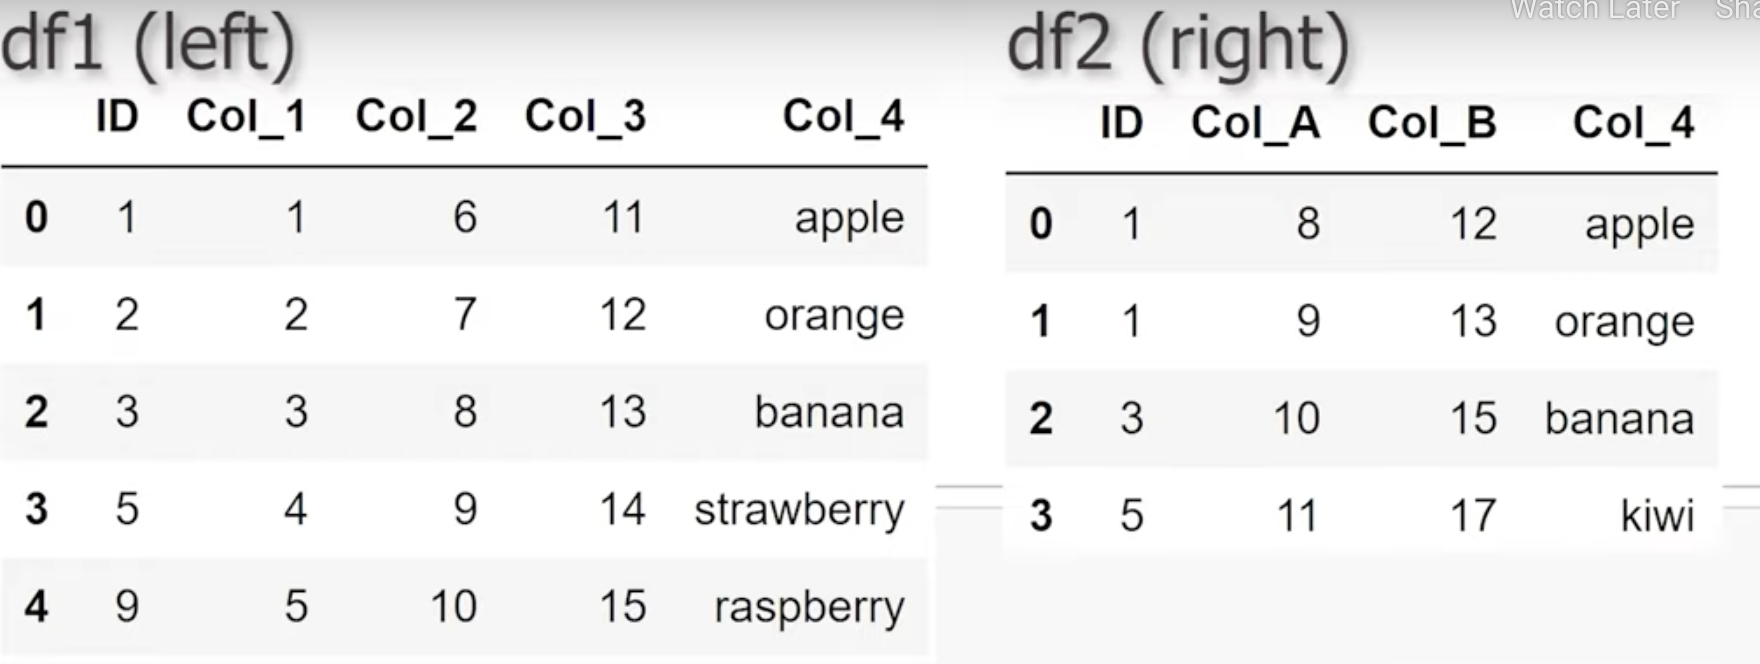

- left join 

In [37]:
pd.merge(df1,df2, on="Col_4", how="left", suffixes=["_left", "_right"]) 
 
# Soldaki dataframe'in hepsi geldi, 
# sagdaki(df2) dataframe'den belirtilen kolonda("Col_4")degeri olanlar geldi 

ID_left  Col_1  Col_2  Col_3       Col_4  ID_right  Col_A  Col_B
0        1      1      6     11       apple       1.0    8.0   12.0
1        2      2      7     12      orange       1.0    9.0   13.0
2        3      3      8     13      banana       3.0   10.0   15.0
3        5      4      9     14  strawberry       NaN    NaN    NaN
4        9      5     10     15    rasberry       NaN    NaN    NaN

- right join 

In [38]:
pd.merge(df1,df2, on="Col_4", how="right", suffixes=["_left", "_right"]) 

ID_left  Col_1  Col_2  Col_3   Col_4  ID_right  Col_A  Col_B
0      1.0    1.0    6.0   11.0   apple         1      8     12
1      2.0    2.0    7.0   12.0  orange         1      9     13
2      3.0    3.0    8.0   13.0  banana         3     10     15
3      NaN    NaN    NaN    NaN    kiwi         5     11     17

#### Common Errors 

- KeyError

KeyError if we choose uncommon column to join 

In [14]:
# pd.merge(df1,df2, on="Col_1")

#to fix it, we should use common column like "Col_4" or "ID " in order to merge our DataFrame

- ValueError

ValueError because joining column doesn't have a consistent dtype

In [41]:
df1 = pd.DataFrame({"ID":[1,2,3,5,9],
                   "Col_1":[1,2,3,4,5],
                   "Col_2":[6,7,8,9,10],
                   "Col_3":[11,12,13,14,15],
                   "Col_4":["apple","orange","banana",'strawberry',"rasberry"]
                   })

df2 = pd.DataFrame({"ID":[1,1,3,5],
                   "Col_A":[8,9,10,11],
                   "Col_B":[12,13,15,17],
#                   "Col_4":[1,2,3,4]
                   "Col_4":["apple","orange","banana","kiwi"]
                   })

In [42]:
pd.merge(df1,df2, on="Col_4")

# str, int 

ID_x  Col_1  Col_2  Col_3   Col_4  ID_y  Col_A  Col_B
0     1      1      6     11   apple     1      8     12
1     2      2      7     12  orange     1      9     13
2     3      3      8     13  banana     3     10     15

- Merge Error

Merge Error because we have "on=" and "left_on=" & "right_on=" column to merge

In [24]:
# pd.merge(df1,df2, on="ID", suffixes=["_l", "_r"], left_on="Col_2", right_on="Col_A" )

** Merge Error **
No common column to perform merge on. 

Merge options: Left_on = None, right_on = None, left_index= False, right_index = False

### df.join ()

Anything you can do with join you can do with merge
 - inner  
 - outer
 - left (default) 
 - right 

In [123]:
df_a = pd.DataFrame({"ID":[1,2,3,5,9,12],
                   "Col_1":[10,2,8,6,4,0],
                   "Col_2":[2,10,0,9,11,3],
                   "Col_3":[4,12,3,0,15,1],
                   "Col_5":[0,1,12,3,5,17], 
                   "Col_4":["apple","orange","banana",'strawberry',"rasberry","avocado"] 
                   })

df_b = pd.DataFrame({"ID":[1,1,3,5,7,12],
                   "Col_A":[7,8,9,10,11,13],
                   "Col_B":[12,13,15,17,7,5],
                   "Col_4":["apple","orange","banana","kiwi","avocado","lemon"]                 
                   })

In [124]:
df_a

ID  Col_1  Col_2  Col_3  Col_5       Col_4
0   1     10      2      4      0       apple
1   2      2     10     12      1      orange
2   3      8      0      3     12      banana
3   5      6      9      0      3  strawberry
4   9      4     11     15      5    rasberry
5  12      0      3      1     17     avocado

In [125]:
df_b

ID  Col_A  Col_B    Col_4
0   1      7     12    apple
1   1      8     13   orange
2   3      9     15   banana
3   5     10     17     kiwi
4   7     11      7  avocado
5  12     13      5    lemon

In [126]:
df_a.join(df_b, on="ID", lsuffix="_l", rsuffix="_r" )

# default left join 
# soldaki dataframe'in hepsini aldi, 
# sag Dataframe'de index numarasi "df1.ID"'ye esit olanlari aldi, olmayanlari bos doldurdu 

ID_l  Col_1  Col_2  Col_3  Col_5     Col_4_l  ID_r  Col_A  Col_B Col_4_r
0     1     10      2      4      0       apple   1.0    8.0   13.0  orange
1     2      2     10     12      1      orange   3.0    9.0   15.0  banana
2     3      8      0      3     12      banana   5.0   10.0   17.0    kiwi
3     5      6      9      0      3  strawberry  12.0   13.0    5.0   lemon
4     9      4     11     15      5    rasberry   NaN    NaN    NaN     NaN
5    12      0      3      1     17     avocado   NaN    NaN    NaN     NaN

In [132]:
df_a.join(df_b, on="Col_2", lsuffix="_l", rsuffix="_r" )

#on='' secilen sutun degerlerini df_b'de index icinde aradi 

ID_l  Col_1  Col_2  Col_3  Col_5     Col_4_l  ID_r  Col_A  Col_B Col_4_r
0     1     10      2      4      0       apple   3.0    9.0   15.0  banana
1     2      2     10     12      1      orange   NaN    NaN    NaN     NaN
2     3      8      0      3     12      banana   1.0    7.0   12.0   apple
3     5      6      9      0      3  strawberry   NaN    NaN    NaN     NaN
4     9      4     11     15      5    rasberry   NaN    NaN    NaN     NaN
5    12      0      3      1     17     avocado   5.0   10.0   17.0    kiwi

In [128]:
# we can specify different join types by using "how=" just like .merge()

df_a.join(df_b, on="Col_2", how="inner", lsuffix="_l", rsuffix="_r" )

# inner join sadece "Col_2"de ortak olan index satirlari getirdi 

ID_l  Col_1  Col_2  Col_3  Col_5  Col_4_l  ID_r  Col_A  Col_B Col_4_r
0     1     10      2      4      0    apple     3      9     15  banana
2     3      8      0      3     12   banana     1      7     12   apple
5    12      0      3      1     17  avocado     5     10     17    kiwi

In [133]:
df_b

ID  Col_A  Col_B    Col_4
0   1      7     12    apple
1   1      8     13   orange
2   3      9     15   banana
3   5     10     17     kiwi
4   7     11      7  avocado
5  12     13      5    lemon

In [131]:
df_a.join(df_b, on="Col_2", how="right", lsuffix="_l", rsuffix="_r" )

# right tabloyu aynen getirdi 
# kiyaslama istenen kolona right tablonuhn index degerlerini yazdi 
# yazilan index degerinde bir hucre varsqa o satiri tamamen getirdi 

ID_l  Col_1  Col_2  Col_3  Col_5  Col_4_l  ID_r  Col_A  Col_B  Col_4_r
2.0   3.0    8.0      0    3.0   12.0   banana     1      7     12    apple
NaN   NaN    NaN      1    NaN    NaN      NaN     1      8     13   orange
0.0   1.0   10.0      2    4.0    0.0    apple     3      9     15   banana
5.0  12.0    0.0      3    1.0   17.0  avocado     5     10     17     kiwi
NaN   NaN    NaN      4    NaN    NaN      NaN     7     11      7  avocado
NaN   NaN    NaN      5    NaN    NaN      NaN    12     13      5    lemon

### df.concat()

#### Joining NumPy Arrays

In [138]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

arr = np.concatenate((arr1, arr2)) #default axis=0 alir, arrayleri yanyana birlestirir 

arr

array([1, 2, 3, 4, 5, 6])

In [140]:
# Join two 2-D arrays along rows (axis=1):
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=0)

arr

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [143]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

arr = np.concatenate((arr1, arr2), axis=1)

arr

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

#### Joining DataFrames via Concat 

With concatenation, your datasets are just stitched together along an axis (either row axis or colomn axis) 

with merge, you might lose rows that don't matches in thr order dataset. 


In [142]:
pd.concat([df1,df2]) #default axis=0

ID  Col_1  Col_2  Col_3       Col_4  Col_A  Col_B
0   1    1.0    6.0   11.0       apple    NaN    NaN
1   2    2.0    7.0   12.0      orange    NaN    NaN
2   3    3.0    8.0   13.0      banana    NaN    NaN
3   5    4.0    9.0   14.0  strawberry    NaN    NaN
4   9    5.0   10.0   15.0    rasberry    NaN    NaN
0   1    NaN    NaN    NaN       apple    8.0   12.0
1   1    NaN    NaN    NaN      orange    9.0   13.0
2   3    NaN    NaN    NaN      banana   10.0   15.0
3   5    NaN    NaN    NaN        kiwi   11.0   17.0

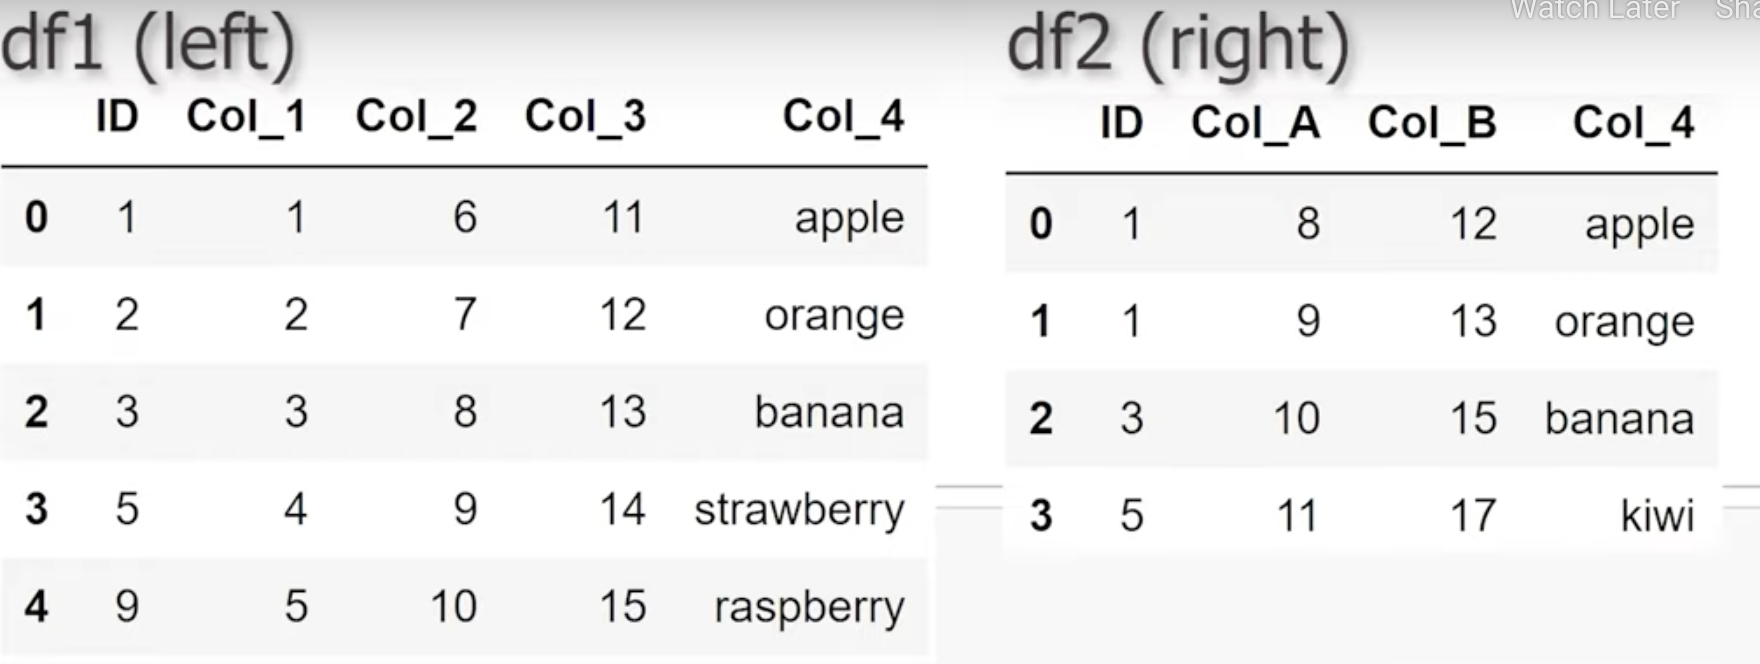

In [23]:
# reset the index 
pd.concat([df1,df2], ignore_index=True) 

ID  Col_1  Col_2  Col_3       Col_4  Col_A  Col_B
0   1    1.0    6.0   11.0       apple    NaN    NaN
1   2    2.0    7.0   12.0      orange    NaN    NaN
2   3    3.0    8.0   13.0      banana    NaN    NaN
3   5    4.0    9.0   14.0  strawberry    NaN    NaN
4   9    5.0   10.0   15.0    rasberry    NaN    NaN
5   1    NaN    NaN    NaN       apple    8.0   12.0
6   1    NaN    NaN    NaN      orange    9.0   13.0
7   3    NaN    NaN    NaN      banana   10.0   15.0
8   5    NaN    NaN    NaN        kiwi   11.0   17.0

In [24]:
# can side-by_side by specifying axis=1
pd.concat([df1,df2], axis=1)

ID  Col_1  Col_2  Col_3       Col_4   ID  Col_A  Col_B   Col_4
0   1      1      6     11       apple  1.0    8.0   12.0   apple
1   2      2      7     12      orange  1.0    9.0   13.0  orange
2   3      3      8     13      banana  3.0   10.0   15.0  banana
3   5      4      9     14  strawberry  5.0   11.0   17.0    kiwi
4   9      5     10     15    rasberry  NaN    NaN    NaN     NaN

- default join is outer that you can specify with "join= "
- there is no option for left or right joins 


In [26]:
pd.concat([df1, df2], axis=0, join='inner') #ortak olan sutunlarda tum degerleri tek sutun altinda getirir 

ID       Col_4
0   1       apple
1   2      orange
2   3      banana
3   5  strawberry
4   9    rasberry
0   1       apple
1   1      orange
2   3      banana
3   5        kiwi

In [144]:
pd.concat([df1, df2], axis=1, join='inner') #ortak index numarasinda tum degerleri tek satirda getirdi

ID  Col_1  Col_2  Col_3       Col_4  ID  Col_A  Col_B   Col_4
0   1      1      6     11       apple   1      8     12   apple
1   2      2      7     12      orange   1      9     13  orange
2   3      3      8     13      banana   3     10     15  banana
3   5      4      9     14  strawberry   5     11     17    kiwi

### df.append()

** Günün sorusu:
How to append new rows to a pandas DataFrame?

In [27]:
df1.append(df2)

ID  Col_1  Col_2  Col_3       Col_4  Col_A  Col_B
0   1    1.0    6.0   11.0       apple    NaN    NaN
1   2    2.0    7.0   12.0      orange    NaN    NaN
2   3    3.0    8.0   13.0      banana    NaN    NaN
3   5    4.0    9.0   14.0  strawberry    NaN    NaN
4   9    5.0   10.0   15.0    rasberry    NaN    NaN
0   1    NaN    NaN    NaN       apple    8.0   12.0
1   1    NaN    NaN    NaN      orange    9.0   13.0
2   3    NaN    NaN    NaN      banana   10.0   15.0
3   5    NaN    NaN    NaN        kiwi   11.0   17.0

In [29]:
df1.append(df2, sort=True) 

Col_1  Col_2  Col_3       Col_4  Col_A  Col_B  ID
0    1.0    6.0   11.0       apple    NaN    NaN   1
1    2.0    7.0   12.0      orange    NaN    NaN   2
2    3.0    8.0   13.0      banana    NaN    NaN   3
3    4.0    9.0   14.0  strawberry    NaN    NaN   5
4    5.0   10.0   15.0    rasberry    NaN    NaN   9
0    NaN    NaN    NaN       apple    8.0   12.0   1
1    NaN    NaN    NaN      orange    9.0   13.0   1
2    NaN    NaN    NaN      banana   10.0   15.0   3
3    NaN    NaN    NaN        kiwi   11.0   17.0   5